<a href="https://colab.research.google.com/github/axiom19/Langchain-for-LLM-App-Development/blob/main/QnA_with_Documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Langchain for LLM Application Development
<hr>

## Question and Answers with Document
LLM and Langchain are used to ask questions and get answers related to personal documents.<br>
This makes it much more powerful as they were not originally trained on that data.

<br>
More key components will be introduced such as embedding models and vector stores as we move away from prompts and parsers

In [21]:
# !pip install langchain-openai openai
# !pip install -U langchain-community
# !pip install docarray

In [52]:
import os

# os.environ['OPENAI_API_KEY']

In [17]:
from langchain.chains import RetrievalQA
from langchain_openai import ChatOpenAI
from langchain.document_loaders import CSVLoader
from langchain.vectorstores import DocArrayInMemorySearch
from IPython.display import display, Markdown
from langchain.embeddings import OpenAIEmbeddings

In [11]:
file = "OutdoorClothingCatalog.csv"
# load the file
loader = CSVLoader(file_path=file)

In [29]:
docs = loader.load()
docs[0]

Document(metadata={'source': 'OutdoorClothingCatalog.csv', 'row': 0}, page_content=": 0\nname: Women's Campside Oxfords\ndescription: This ultracomfortable lace-to-toe Oxford boasts a super-soft canvas, thick cushioning, and quality construction for a broken-in feel from the first time you put them on. \n\nSize & Fit: Order regular shoe size. For half sizes not offered, order up to next whole size. \n\nSpecs: Approx. weight: 1 lb.1 oz. per pair. \n\nConstruction: Soft canvas material for a broken-in feel and look. Comfortable EVA innersole with Cleansport NXT® antimicrobial odor control. Vintage hunt, fish and camping motif on innersole. Moderate arch contour of innersole. EVA foam midsole for cushioning and support. Chain-tread-inspired molded rubber outsole with modified chain-tread pattern. Imported. \n\nQuestions? Please contact us for any inquiries.")

In [12]:
# importing vectorstoreindex which is gonna help us creating vector store easily
from langchain.indexes import VectorstoreIndexCreator

<li><b>Vector Representation </b>: In NLP, textual data (like documents or sentences) are transformed into numeric representations called embeddings. These embeddings are vectors (multi-dimensional arrays) that capture the semantic meaning of the text.

<li><b>Vector Store</b>: A Vector Store is a database that stores these embeddings. When a query is made, the system compares the query's embedding with the embeddings in the store to find similar documents based on their proximity in vector space.

<li><b>Indexing</b>: The index in this context is a structure built to quickly search and retrieve the most relevant embeddings from the vector store. It makes the retrieval process more efficient by organizing the embeddings in a way that allows for fast similarity searches.

In [32]:
index= VectorstoreIndexCreator(
    vectorstore_cls=DocArrayInMemorySearch,
    embedding=OpenAIEmbeddings()
).from_loaders([loader])

In [31]:
index

VectorStoreIndexWrapper(vectorstore=<langchain_community.vectorstores.docarray.in_memory.DocArrayInMemorySearch object at 0x78cd5ffeb580>)

In [46]:
query = """
Please list all your shirts with sun protection in a table in markdown format.
Each row should contain the shirt name and a brief description.
Then, write a 2-3 sentence summary for each shirt below the table.
"""

In [33]:
retrieved_docs = index.vectorstore.similarity_search(query)
print(f"Number of documents retrieved: {len(retrieved_docs)}")

Number of documents retrieved: 4


In [36]:
for doc in retrieved_docs:
    print(f"Document: {doc.page_content}\n")

Document: : 618
name: Men's Tropical Plaid Short-Sleeve Shirt
description: Our lightest hot-weather shirt is rated UPF 50+ for superior protection from the sun's UV rays. With a traditional fit that is relaxed through the chest, sleeve, and waist, this fabric is made of 100% polyester and is wrinkle-resistant. With front and back cape venting that lets in cool breezes and two front bellows pockets, this shirt is imported and provides the highest rated sun protection possible. 

Sun Protection That Won't Wear Off. Our high-performance fabric provides SPF 50+ sun protection, blocking 98% of the sun's harmful rays.

Document: : 374
name: Men's Plaid Tropic Shirt, Short-Sleeve
description: Our Ultracomfortable sun protection is rated to UPF 50+, helping you stay cool and dry. Originally designed for fishing, this lightest hot-weather shirt offers UPF 50+ coverage and is great for extended travel. SunSmart technology blocks 98% of the sun's harmful UV rays, while the high-performance fabric

In [43]:
llm = ChatOpenAI(temperature=0.1)

In [47]:
# Create a retriever from the index
retriever = index.vectorstore.as_retriever()

# Create a RetrievalQA chain
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",  # Other types are 'map_reduce' or 'refine'
    retriever=retriever
)

# Run the query
result = qa_chain.run(query)

In [48]:
display(Markdown(result))

| Shirt Name                                | Description                                                                                                      |
|-------------------------------------------|------------------------------------------------------------------------------------------------------------------|
| Men's Tropical Plaid Short-Sleeve Shirt  | Rated UPF 50+ for superior sun protection, made of 100% polyester, wrinkle-resistant, with front and back venting. |
| Men's Plaid Tropic Shirt, Short-Sleeve    | UPF 50+ sun protection, designed for fishing, wrinkle-free, quick-drying fabric with front and back venting.       |
| Sun Shield Shirt by                       | High-performance sun shirt with UPF 50+ protection, moisture-wicking, fits comfortably over swimsuits.             |
| Men's TropicVibe Shirt, Short-Sleeve      | UPF 50+ sun protection, lightweight, wrinkle-resistant, with front and back venting and two front pockets.         |

- The Men's Tropical Plaid Short-Sleeve Shirt offers superior sun protection with a relaxed fit and venting for cool breezes.
- The Men's Plaid Tropic Shirt is designed for fishing with quick-drying fabric and UPF 50+ protection.
- The Sun Shield Shirt provides high-performance sun protection with moisture-wicking features and a comfortable fit over swimsuits.
- The Men's TropicVibe Shirt combines UPF 50+ protection with a lightweight feel, wrinkle resistance, and convenient front pockets.

In [51]:
# another way for stuffin method
response = index.query(query, llm=llm)
display(Markdown(response))

| Shirt Name                                | Description                                                                                                       |
|-------------------------------------------|-------------------------------------------------------------------------------------------------------------------|
| Men's Tropical Plaid Short-Sleeve Shirt  | Rated UPF 50+ for superior sun protection, made of 100% polyester, wrinkle-resistant, with front and back venting. |
| Men's Plaid Tropic Shirt, Short-Sleeve    | UPF 50+ sun protection, designed for fishing, wrinkle-free, with front and back venting, two front pockets.         |
| Sun Shield Shirt by                       | High-performance sun shirt with UPF 50+ protection, moisture-wicking, fits comfortably over swimsuit.               |
| Men's TropicVibe Shirt, Short-Sleeve      | UPF 50+ sun protection, lightweight, wrinkle-resistant, front and back venting, two front pockets.                  |

- The Men's Tropical Plaid Short-Sleeve Shirt is a relaxed fit shirt made of 100% polyester with UPF 50+ sun protection and front/back venting for cool breezes.
- The Men's Plaid Tropic Shirt is designed for fishing, offering UPF 50+ protection, wrinkle-free fabric, and front/back venting for extended travel comfort.
- The Sun Shield Shirt provides high-performance sun protection with UPF 50+, moisture-wicking fabric, and a comfortable fit over swimsuits.
- The Men's TropicVibe Shirt offers UPF 50+ sun protection, a lightweight feel, wrinkle resistance, and front/back venting for cool comfort in hot weather.

## LLM's on Documents

General idea: We want to use LLM and combine it with a lot of our documents.
Key issue: LLMs can only inspect a few thousand tokens at a time. So if we have large documents its not easy to do so.

<br>
This is where embeddings and vector stores come into play.
<ol>
<li><b>Embeddings</b>
<ul>
<li>Embeddings create numerical representations for pieces of text.
<li>This numerical representation captures the semantic meaning/content of the text.
<li>Pieces of text with similar content will have similar vectors
</ul>
<li>Vector Database
<ul>
<li> Vector database is a way to store these vector representations that we created in the previous step
<li>We populate it with chunks of text coming from incoming documents.
<li>If we have a big incoming document, we break it into smaller chunks which helps create texts which are smaller than the original document as we may not be able to pass the whole document to the LLM.
<li> We then create embeddings for these texts to store in vector database.

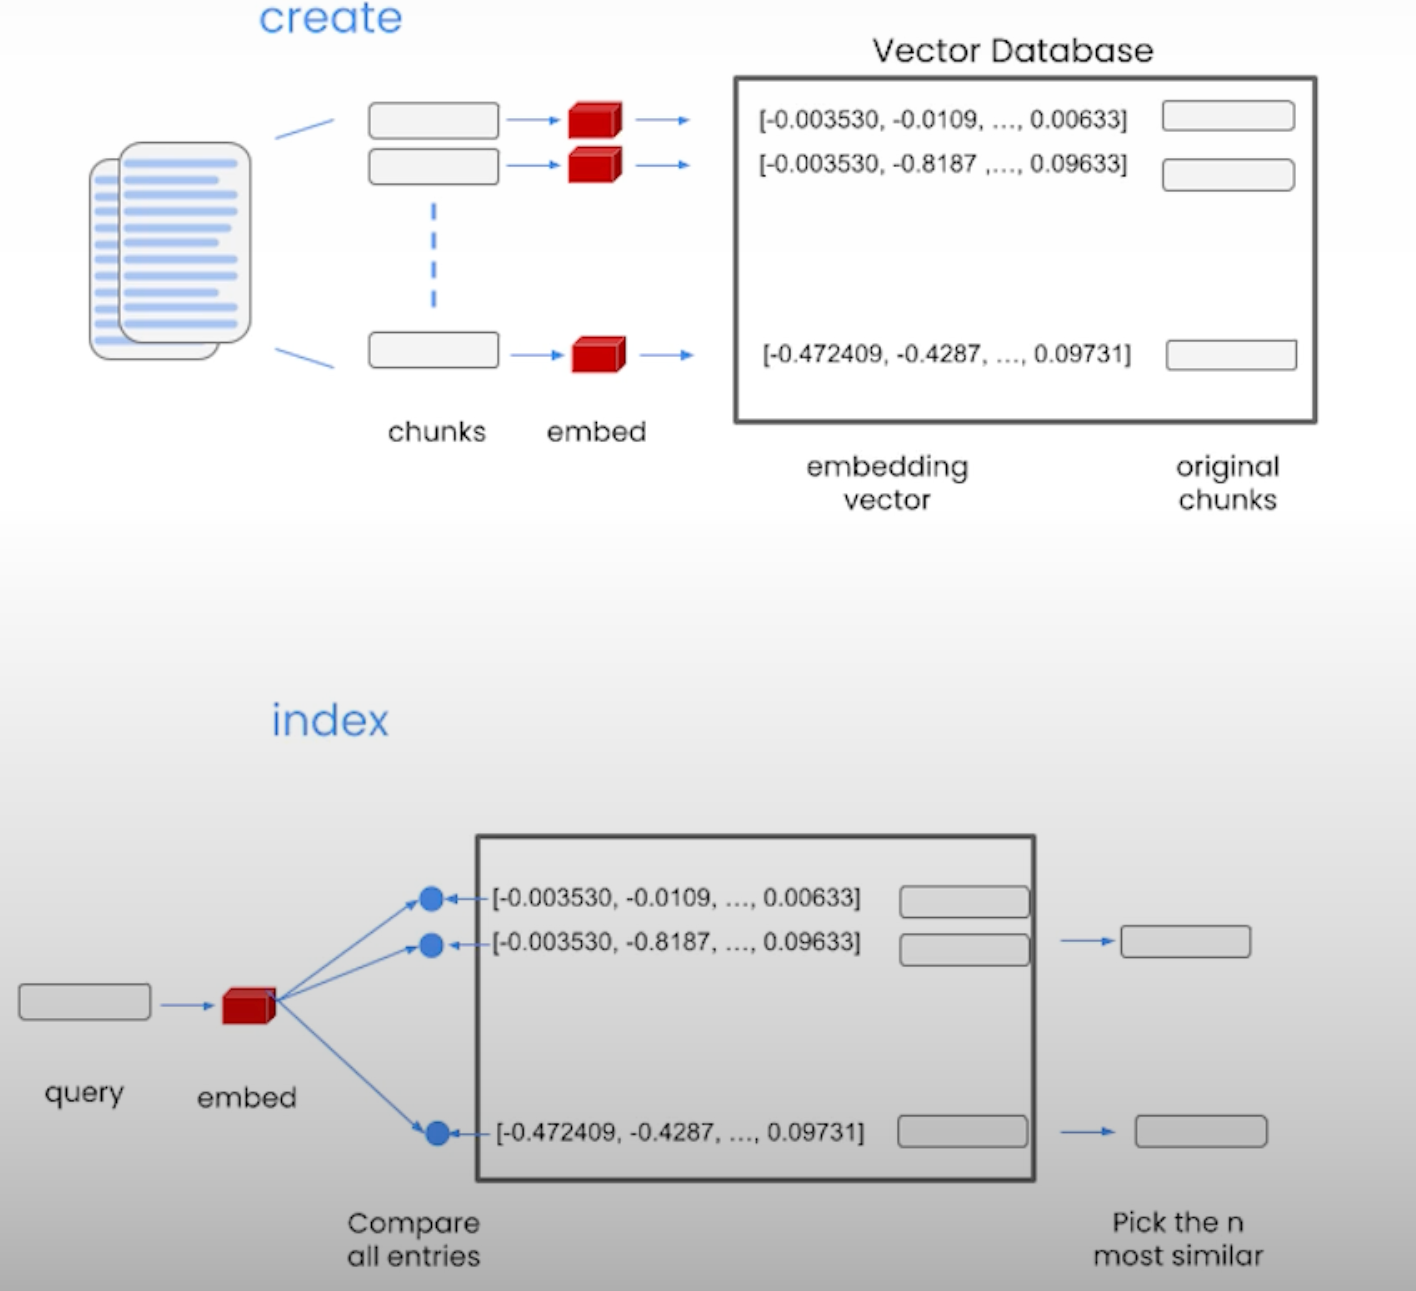

## Stuff method
Stuffing is the simplest method. You simple stuff all data into the prompts as context to pass to the language model.
<ul>
<li> <b>Pros</b>: It makes a single call to the LLM. The LLM has access to all data at once.
<li> <b>Cons</b>: LLMs have a context length, and for large documents or many documents this will not work as it will result ina prompt larger than the context length.

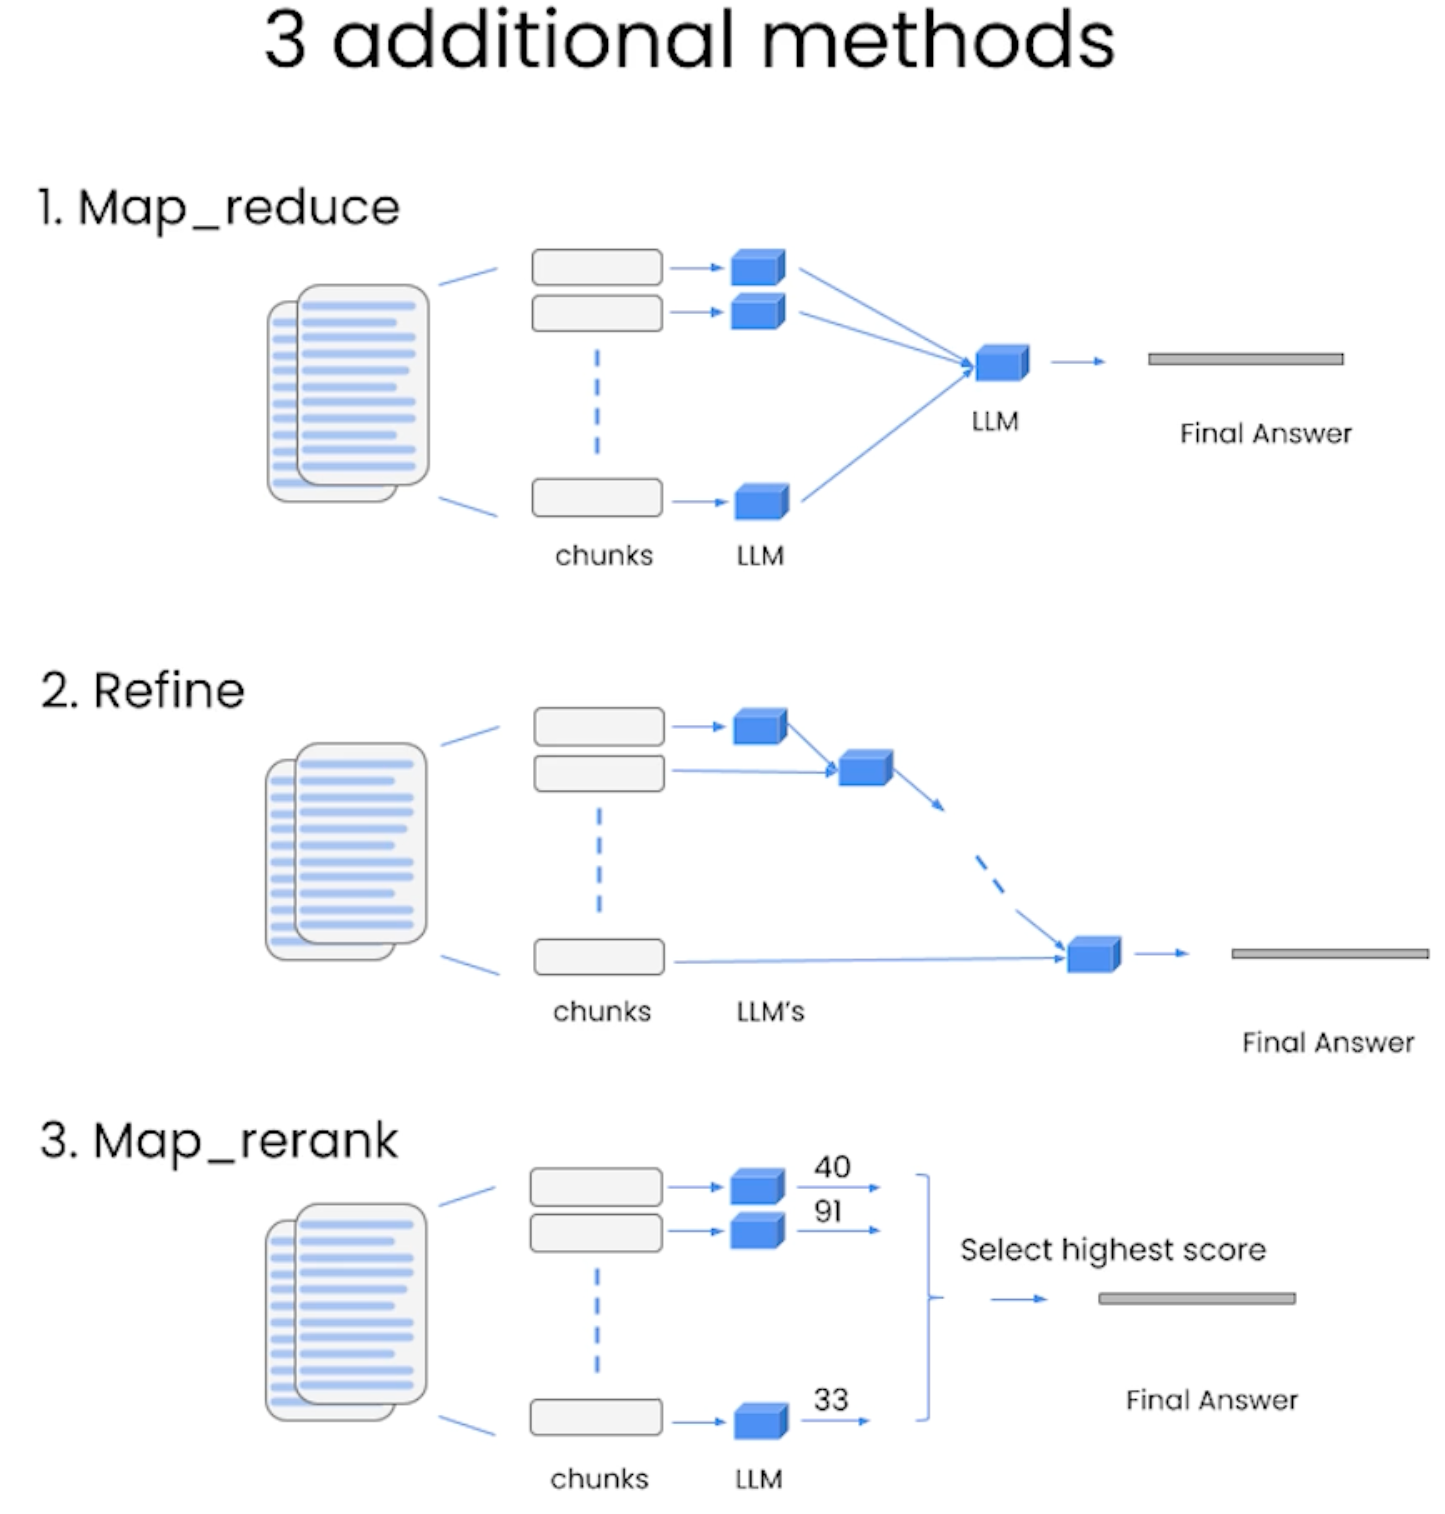